In [0]:
from google.colab import files
import matplotlib.pyplot as plt
from scipy.linalg import circulant
import numpy as np
import time

from google.colab import drive
import cvxpy as cvx
import imageio

In [2]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py -O mnist.py

--2020-04-02 00:21:24--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2.6K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   2.63K  --.-KB/s    in 0s      

2020-04-02 00:21:24 (47.3 MB/s) - ‘mnist.py’ saved [2697/2697]



In [0]:
import mnist

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset(flatten=True)

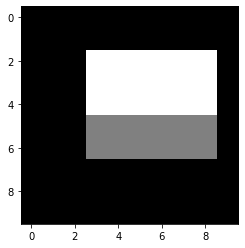

In [0]:
pic = np.zeros((10,10))
pic[2:7,3:9] = 1

pic[5:7, 3:9] = 0.5
plt.imshow(pic,'gray')

In [0]:
pic = X_train[0].reshape([28,28])

In [0]:
K = 10
L = 784
N = 784

In [0]:
m1 = pic.reshape((N,1))

In [0]:
C = np.random.randn(L,N)


h1 = np.random.randn(K,1)
h2 = np.random.randn(K,1)

B = np.random.randn(L,K)

In [0]:
A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))

In [0]:
X1 = h1 @ m1.reshape((1,N))
X2 = h2 @ m1.reshape((1,N))

X = np.vstack((X1,X2))

In [0]:
a, b = A.shape
A0 = np.zeros((a,b))
A1 = np.hstack((A,A0))
A2 = np.hstack((A0,A))
A = np.vstack((A1,A2))

In [0]:
y =  A @ cvx.vec(X)

In [14]:
start = time.time()
W1 = cvx.Variable((2*K,2*K), symmetric=True)
W2 = cvx.Variable((N,N),  symmetric=True)
Z = cvx.Variable((2*K,N))

constraints = [cvx.bmat([[W1,Z],[Z.T,W2]]) >> 0,
               y == A @ cvx.vec(Z)]
obj = cvx.Minimize(1/2 * (cvx.trace(W1) + cvx.trace(W2)))
problem = cvx.Problem(obj, constraints)
problem.solve()
print(start - time.time())

-174.33707642555237


In [0]:
Xk = Z.value

In [0]:
u, s, v = np.linalg.svd(Xk)

In [17]:
s

array([3.92416615e+01, 6.57272675e-01, 5.57971953e-01, 5.20492681e-01,
       4.85435917e-01, 4.27856660e-01, 3.76289350e-01, 3.48760490e-01,
       2.67864428e-01, 2.36340022e-01, 3.59714906e-02, 3.49776459e-02,
       3.30387953e-02, 3.20006396e-02, 3.18712798e-02, 3.11567805e-02,
       3.08527954e-02, 2.96098299e-02, 2.85401410e-02, 2.77460171e-02])

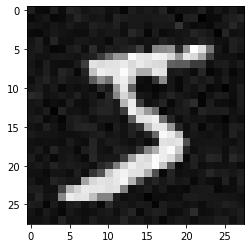

In [20]:
result = -v[0,:].reshape((28,28))
plt.imshow(result,'gray')

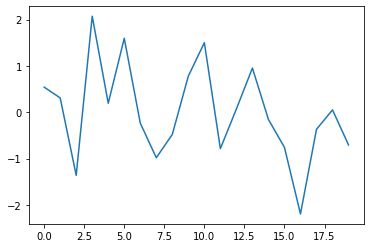

In [21]:
plt.plot(np.vstack((h1,h2)))

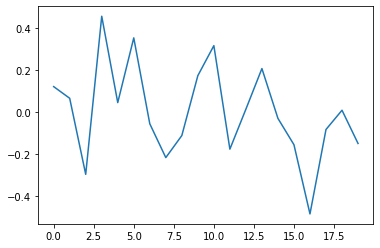

In [22]:
plt.plot(-u[:,0])

In [0]:
y = A @ X.reshape((15680,1))

In [25]:
np.linalg.norm(y - A @ Xk.reshape((15680,1)))

5321.040434228663